# Imports

In [1]:
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc

%matplotlib inline

rc('animation', html='html5')

Using TensorFlow backend.
/Users/arw/anaconda3/envs/text-analytics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/arw/anaconda3/envs/text-analytics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/arw/anaconda3/envs/text-analytics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

# Plotting setup

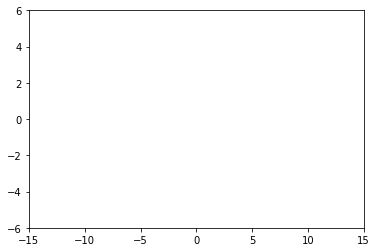

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();

ax.set_xlim([-15,15])
ax.set_ylim([-6,6])
line1, = ax.plot([], [], '-')
line2 = ax.scatter([], [])

# Data Setup
Usually, we load real data from some source, but in this case we will use the toy example from lecture

In [3]:
data = [(2,0),(5,-2),(-2,2),(-1,-3)]
labels = [-1,-1,1,1]

# Data preparation for learning
All frameworks expect data in a certain _format_. Keras expects its input to be in *Numpy* matrices.

We usually use `X` to denote the data, and `y` to denote labels. 
`X` is a matrix of size `num_examples x num_features`, in this case, `4 x 2`.
`y` is a vector of size `num_examples`, one label per example. In this case, `4`.

In [4]:
X = np.array(data) # Feature matrix
y = np.array(labels) # Label vector

print("X shape:",X.shape)
print("y shape:",y.shape)
print(X)

X shape: (4, 2)
y shape: (4,)
[[ 2  0]
 [ 5 -2]
 [-2  2]
 [-1 -3]]


# Model definition

In [5]:
model = Sequential()
model.add(Dense(1, input_shape=(2,))) # No of outputs - 1 here (since it is a single number); No of input features - two here (2,)

model.compile(loss="mse", optimizer="sgd", metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# Learning


Epoch 1: 0.25 (acc) 4.06 (loss)
Epoch 2: 0.25 (acc) 3.27 (loss)
Epoch 3: 0.50 (acc) 2.70 (loss)
Epoch 4: 0.50 (acc) 2.27 (loss)
Epoch 5: 0.50 (acc) 1.94 (loss)
Epoch 6: 0.50 (acc) 1.68 (loss)
Epoch 7: 0.50 (acc) 1.47 (loss)
Epoch 8: 0.75 (acc) 1.29 (loss)
Epoch 9: 0.75 (acc) 1.14 (loss)
Epoch 10: 0.75 (acc) 1.02 (loss)
Epoch 11: 0.75 (acc) 0.91 (loss)
Epoch 12: 0.75 (acc) 0.82 (loss)
Epoch 13: 0.75 (acc) 0.74 (loss)
Epoch 14: 0.75 (acc) 0.67 (loss)
Epoch 15: 0.75 (acc) 0.61 (loss)
Epoch 16: 0.75 (acc) 0.55 (loss)
Epoch 17: 0.75 (acc) 0.50 (loss)
Epoch 18: 0.75 (acc) 0.46 (loss)
Epoch 19: 0.75 (acc) 0.42 (loss)
Epoch 20: 1.00 (acc) 0.39 (loss)
Epoch 21: 1.00 (acc) 0.36 (loss)
Epoch 22: 1.00 (acc) 0.33 (loss)
Epoch 23: 1.00 (acc) 0.31 (loss)
Epoch 24: 1.00 (acc) 0.29 (loss)
Epoch 25: 1.00 (acc) 0.27 (loss)
Epoch 26: 1.00 (acc) 0.25 (loss)
Epoch 27: 1.00 (acc) 0.24 (loss)
Epoch 28: 1.00 (acc) 0.23 (loss)
Epoch 29: 1.00 (acc) 0.21 (loss)
Epoch 30: 1.00 (acc) 0.20 (loss)
Epoch 31: 1.00 (ac

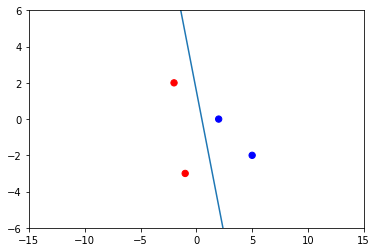

In [6]:
parameter_history = []
for epoch in range(50): # We will 'look at' our data set 50 times
    # Perform one step over the entire dataset
    loss_history = model.fit(X, y, epochs=1, verbose=False) # Obtain W's and b's
    
    # Get predictions (value of the objective function, f)
    y_pred = model.predict(X, verbose=False)
    
    # See how well our model is doing
    # Recall our classes are [-1,-1,1,1]
    num_correct = 0
    if y_pred[0] < 0: num_correct += 1
    if y_pred[1] < 0: num_correct += 1
    if y_pred[2] > 0: num_correct += 1
    if y_pred[3] > 0: num_correct += 1
    acc = num_correct / 4.0   # Not very granular - only 25%, 50%, 75%, 100% owing to having only 4 examples!
    loss = loss_history.history['loss'][-1]  # More granular - better for optimizing
    print("Epoch %d: %0.2f (acc) %0.2f (loss)"%(epoch+1, acc, loss))
    
    # Not mandatory: Save parameters for later analysis
    w, b = model.layers[0].get_weights()
    parameter_history.append((w,b))

plt.scatter([x[0] for x in data],
            [x[1] for x in data],
            c=['b','b','r','r'],
            s=40)

x1 = np.arange(-20,20,0.1)
x2 = (-1 * b - (w[0] * x1)) / w[1]
plt.axis([-15, 15, -6, 6])
plt.plot(x1,x2)

# Bonus: Optimization animation

In [7]:
def show_learning(history):
    global iteration
    global fig
    iteration = 0
    # initialization function: plot the background of each frame
    def init():
        line1.set_data([], [])
        iteration = 0
        return (line1,line2,)

    # animation function. This is called sequentially
    def animate(i):
        global iteration
        iteration = min(iteration, len(history)-1)
        x = np.arange(-20,20,0.1)
        y = (-1 * history[iteration][1] - (history[iteration][0][0] * x)) / history[iteration][0][1]

        line1.set_data(x, y)
        line2 =  ax.scatter([p[0] for p in data], [p[1] for p in data], c=['b','b','r','r'], s=40)

        iteration += 1

        return (line1,line2)

    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(history)+5, interval=250, blit=True)

    return anim
show_learning(parameter_history)